<h1><center>Laboratorio 6: El Pandas no Muerde (act III) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudantes: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Daniel Quilodrán
- Nombre de alumno 2: Katherine Rutte


### **Link de repositorio de GitHub:** `https://github.com/quilo98/Labs_MDS`


## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [71]:
!pip install --upgrade plotly

In [72]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [73]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [74]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [75]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Análisis Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> Respuesta Aquí 
```
El analisis univariable se refiere a estudiar el comportamiento de una variable de forma individual, con el objetivo de comprender como cada variable por si sola influye en el problema a resolver. Se ocupan distintas tecnicas estadisticas y graficas para analizar variables numericas y categoricas
El analisis multivariable es utilizado para estudiar la interacción entre variables, es decir se estudia mas de una variable simultaneamente con el objetivo de identificar relaciones entre ellas.
Con respecto al analisis de datos faltantes es el proceso de identificar valores faltantes en el conjunto de datos para posteriormente aplicar tecnicas de imputacion de valores faltantes.
```

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [76]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
            count = (
                serie.value_counts()[0:100]
                .reset_index()
                .rename(columns = {serie.name: 'Count'})
            )
            fig = px.bar(
                x=count['index'].astype(str),
                y=count["Count"],
                title=f"100 Most common categories of {serie.name}",
            )
    
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [77]:
# Analisis de Price
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations    525461.000000
Mean                           4.688834
Std                          146.126914
Min                       -53594.360000
25%                            1.250000
50%                            2.100000
75%                            4.210000
Max                        25111.090000
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

    Análisis de la primera serie...

In [78]:
# Analisis de Invoice
profile_serie(df_retail["Invoice"])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

In [79]:
# Analisis de StockCode
profile_serie(df_retail["StockCode"])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

In [80]:
# Analisis de Description
profile_serie(df_retail["Description"])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

In [81]:
# Analisis de Quantity
profile_serie(df_retail["Quantity"])

## Quantity Profile

Type                              int64
Number of observations    525461.000000
Mean                          10.337667
Std                          107.424110
Min                        -9600.000000
25%                            1.000000
50%                            3.000000
75%                           10.000000
Max                        19152.000000
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

In [82]:
# Analisis de invoice date
profile_serie(df_retail["InvoiceDate"])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

In [83]:
# Analisis de customer ID
profile_serie(df_retail["Customer ID"])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

In [84]:
# Analisis de country
profile_serie(df_retail["Country"])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

    Análisis de la n-esima serie...

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes. Ejecute la función `profile_df` y comente sus resultados.

In [85]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

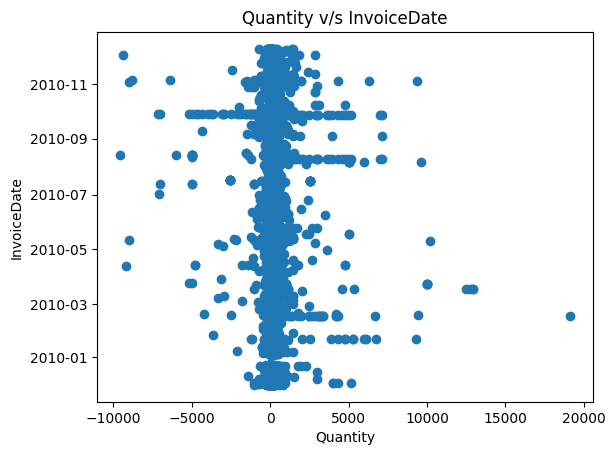

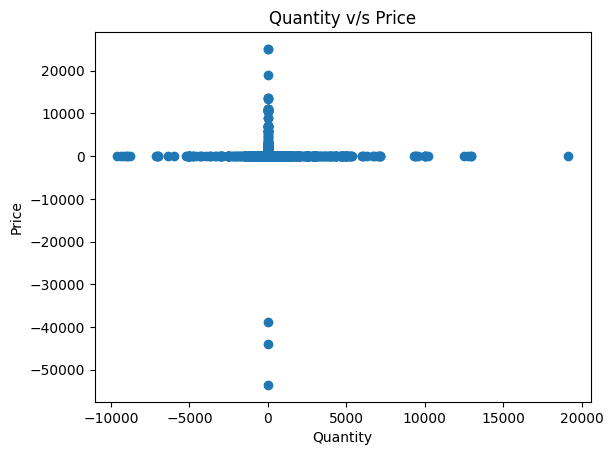

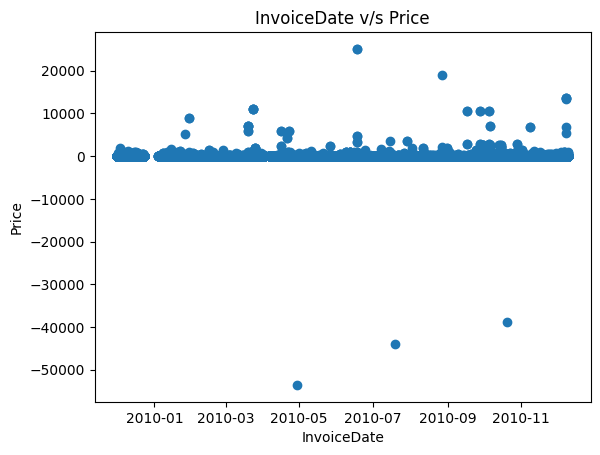

## Correlation:

## Missing Matrix:

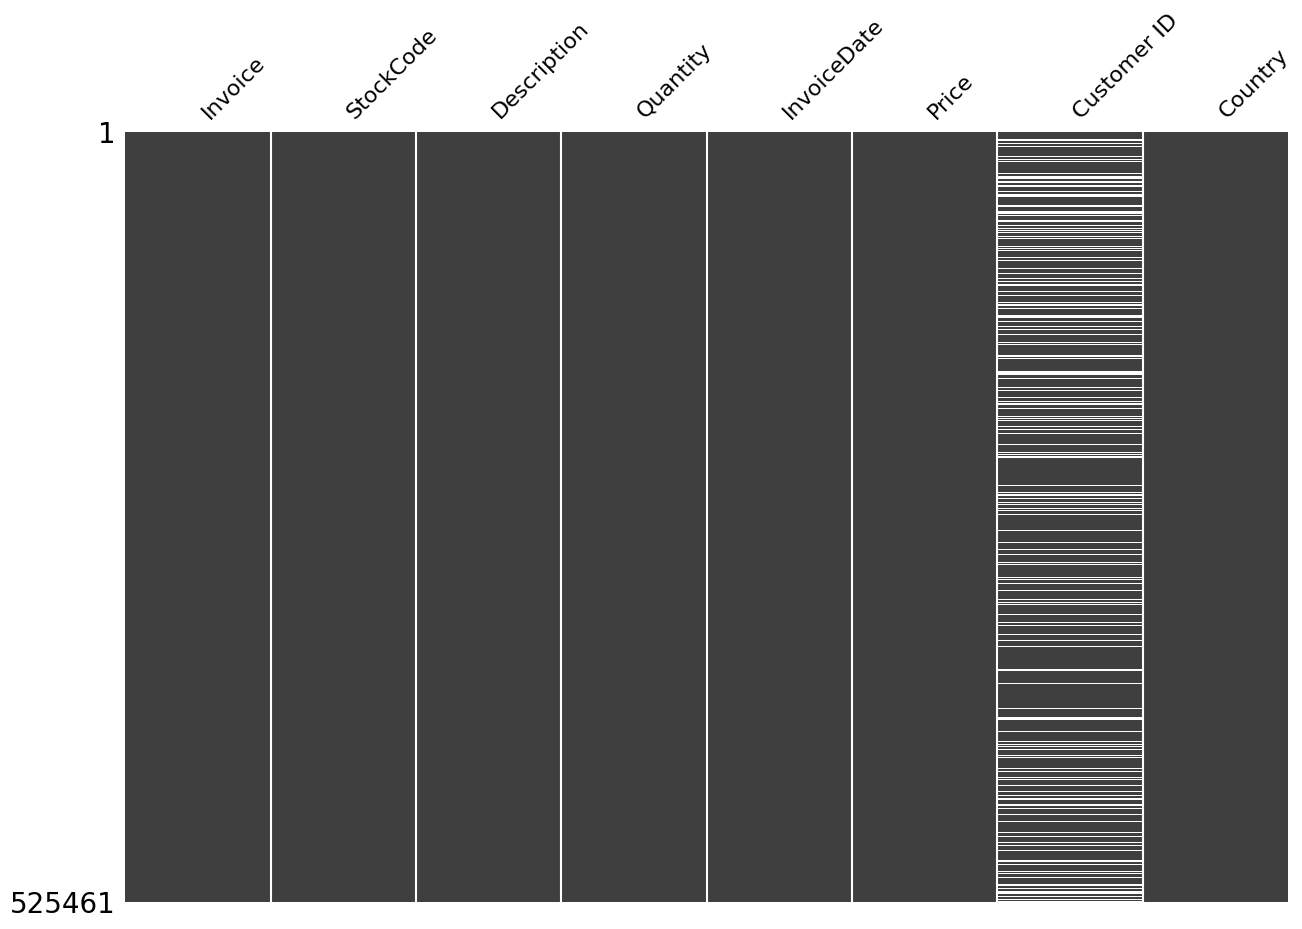

In [86]:
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que genere una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [87]:
def limpieza_datos(df):
    # Crear una copia explícita del DataFrame
    df_copy = df.copy()
    
    # Filtrar filas donde Quantity sea mayor o igual a 1 y Price sea mayor o igual a 1 
    df_copy = df_copy[df_copy['Quantity'] >= 1]
    df_copy = df_copy[df_copy['Price'] >= 0]
    
    # Agregar -1 como una nueva categoría y rellenar valores faltantes
    df_copy["Customer ID"] = df_copy["Customer ID"].cat.add_categories([-1])
    df_copy["Customer ID"].fillna(-1, inplace=True)
    
    return df_copy

In [88]:
df = limpieza_datos(df_retail)

In [89]:
# Analisis de customer ID
profile_serie(df["Customer ID"])

## Customer ID Profile

Type                           category
Number of observations         513132.0
Unique                           4315.0
Top                                -1.0
Freq                           105437.0
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   513039
Duplicate rows (%)              99.98 %
Total size in memory      5298528 bytes
dtype: object

In [90]:
# Analisis de quantity
profile_serie(df["Quantity"])

## Quantity Profile

Type                              int64
Number of observations    513132.000000
Mean                          11.715475
Std                           92.974904
Min                            1.000000
25%                            1.000000
50%                            3.000000
75%                           10.000000
Max                        19152.000000
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        9645.549205
Skew                          80.347813
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   512968
Duplicate rows (%)              99.97 %
Total size in memory      8210112 bytes
dtype: object

In [91]:
# Analisis de Price
profile_serie(df["Price"])

## Price Profile

Type                            float64
Number of observations    513132.000000
Mean                           4.239585
Std                           63.567840
Min                            0.000000
25%                            1.250000
50%                            2.100000
75%                            4.210000
Max                        25111.090000
Negative                              0
Negative (%)                      0.0 %
Zeros                              1566
Zeros (%)                        0.31 %
Kurt                       61738.835225
Skew                         210.686950
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   512276
Duplicate rows (%)              99.83 %
Total size in memory      8210112 bytes
dtype: object

## Bivariant Analysis:

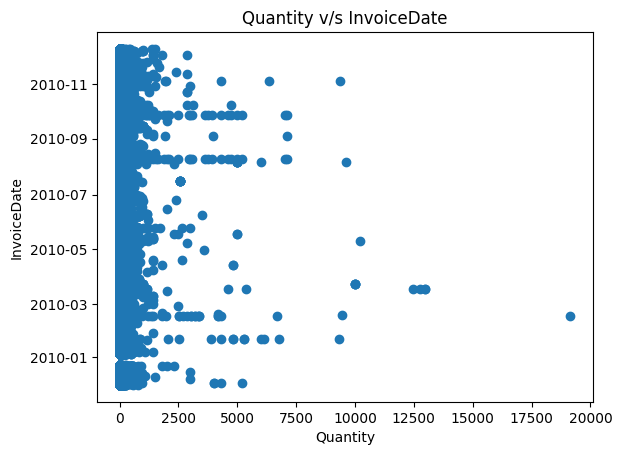

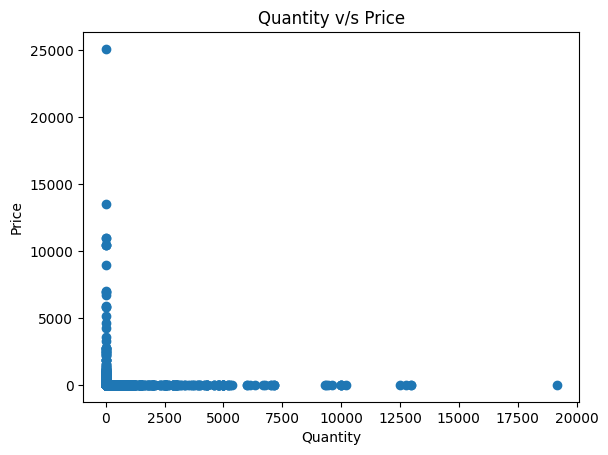

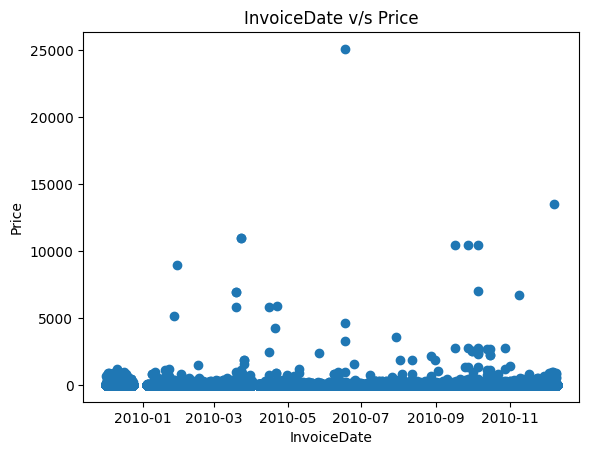

## Correlation:

## Missing Matrix:

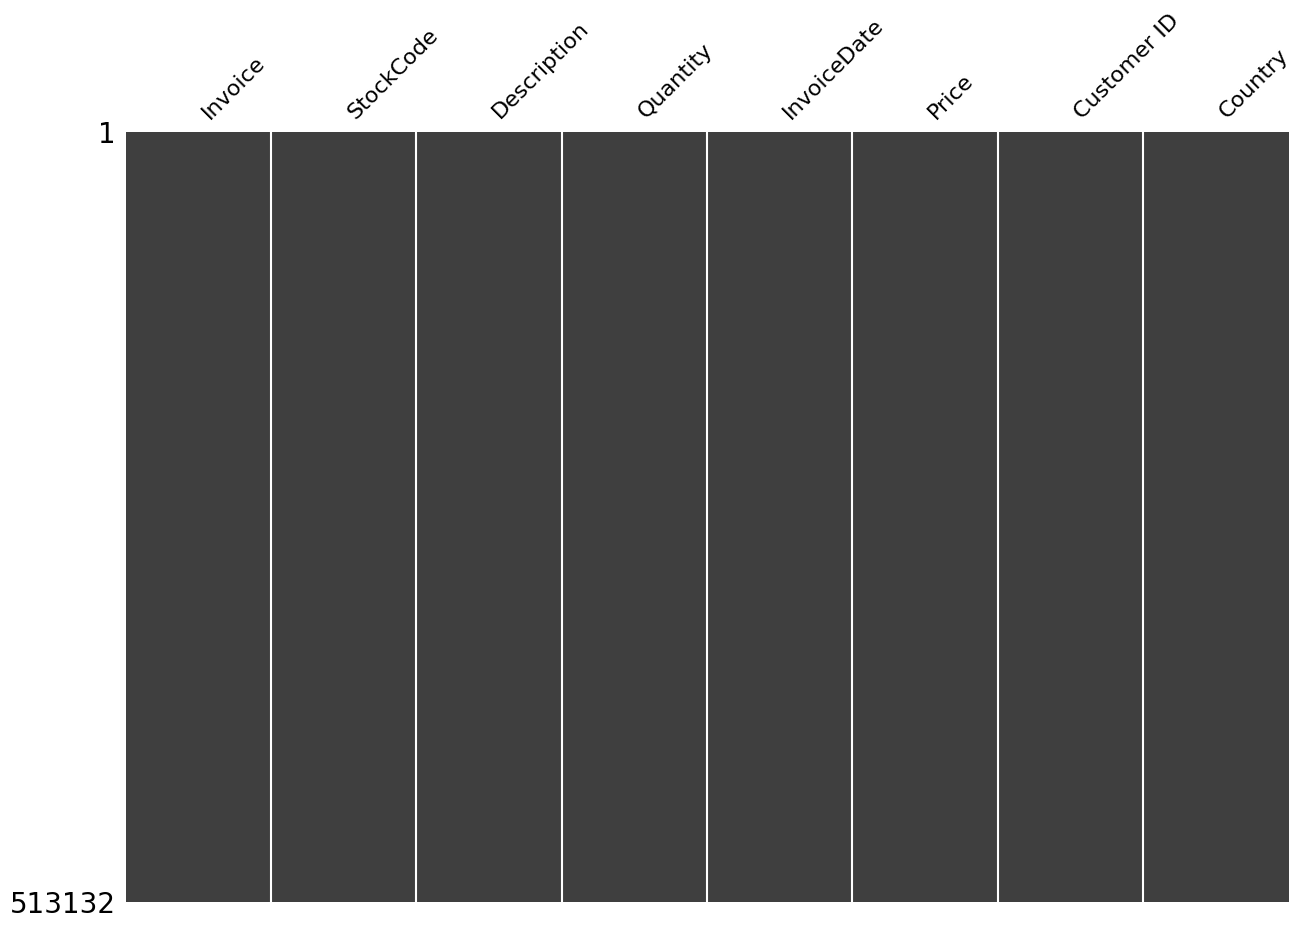

In [92]:
profile_df(df)

A continuación se comentan los resultados de los gráficos:
* En el primer gráfico de Invoice Date vs Quantity, podemos observar algunos comportamientos extraños, principalmente con la existencia de cantidades negativas de ventas en algunos días, esto no hace sentido ya que no deberían existir "ventas negativas" dentro de nuestros datos, si omitimos esto, podemos observar que existe una gran concentración de Quantity a lo largo de los días en los valores entre 0 y 5.000, con algunos datos que se escapan de estos valores siendo el máximo cercano a los 20.000
* En el segundo gráfico de Quantity vs Price se observa algo similar que en el anterior, donde aparecen tanto precio como cantidades negativas, lo cual no corresponde a la naturaleza de nuestros datos, omitiendo esto, se observa que los valores de cantidades varía bastante para los productos con valores cercanos a cero, aquí se concentra la mayor variación en cuanto a la cantidad, mientras que por otro lado, para los productos con precios mas altos los valores de cantidad se mantienen cercanos a cero, dando a entender que al realizar una compra de un objeto caro esto no se hace en grandes cantidades.
* En el tercer gráfico de Price vs Invoice Date, hay al menos 3 datos que presentan precios negativos, lo que nuevamente no hace sentido a nuestros datos, omitiendo esto, la concentración de los precios se mantienen en valores pequeños, exceptuando por algunos outliers, pero no se observa algún cambio significativo en la concentración de precio frente a los distintos días analizados.
* En cuanto a la matriz de correlación este no presenta una correlación en las variables analizadas (Price y Quantity) con un valor de 0.002 Aprox.
* Por último la Missing Matrix nos muestra que para la columna 'Customer ID' presenta bastantes datos perdidos, es decir, no se puede identificar al cliente que realizó la compra, esto debe tratarse según el análisis que queramos realizar, por ejemplo, en caso de querer observar las ventas totales por productos esto no es relevante, por otro lado si queremos analizar las compras realizadas por un consumidor en particular, se deberán tratar de manera distinta ya que si nos afectaría bastante el tener datos faltantes.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [93]:
# Ingresos vs nombre del producto
# Calculamos los ingresos como = Price * Quantity y luego agrupamos por producto 

#Agregamos ventas totales
df["TotalSales"] = df["Price"]*df["Quantity"]

#Agrupamos por descripcion
df_product_sales = df.groupby("Description")["TotalSales"].sum().reset_index()
df_product_sales.head()

,Description,TotalSales
0,DOORMAT UNION JACK GUNS AND ROSES,1206.81
1,3 STRIPEY MICE FELTCRAFT,1343.98
2,4 PURPLE FLOCK DINNER CANDLES,298.11
3,ANIMAL STICKERS,80.85
4,BLACK PIRATE TREASURE CHEST,111.78


In [94]:
df_top30_sales = df_product_sales.sort_values(by="TotalSales", ascending=False).head(30)
df_top30_sales

,Description,TotalSales
2520,Manual,262992.08
3335,REGENCY CAKESTAND 3 TIER,170078.51
4357,WHITE HANGING HEART T-LIGHT HOLDER,160630.78
1284,DOTCOM POSTAGE,116408.71
272,ASSORTED COLOUR BIRD ORNAMENT,73092.99
2746,PAPER CHAIN KIT 50'S CHRISTMAS,58189.25
2130,JUMBO BAG RED RETROSPOT,56595.51
2760,PARTY BUNTING,49682.72
3130,POSTAGE,49477.54
3456,ROTATING SILVER ANGELS T-LIGHT HLDR,47985.09


In [95]:
# Visualizacion de TOP 30 de acuerdo a los ingresos generados
fig = px.bar(df_top30_sales,
             x="Description",
             y="TotalSales",
             title="Top 30 productos por ganancias",
             labels={"Description": "Descripción del producto", "TotalSales": "Ganancias totales"})


fig.update_layout(height=600)

fig.show()


In [96]:
# Cantidad vs descripcion
df_product_quantity = df.groupby("Description")["Quantity"].sum().reset_index()
df_product_quantity.head()

,Description,Quantity
0,DOORMAT UNION JACK GUNS AND ROSES,179
1,3 STRIPEY MICE FELTCRAFT,692
2,4 PURPLE FLOCK DINNER CANDLES,207
3,ANIMAL STICKERS,385
4,BLACK PIRATE TREASURE CHEST,57


In [97]:
df_top30_q = df_product_quantity.sort_values(by="Quantity", ascending=False).head(30)
df_top30_q

,Description,Quantity
4555,nan,150098
4357,WHITE HANGING HEART T-LIGHT HOLDER,58793
4463,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55202
710,BROCADE RING PURSE,48384
2710,PACK OF 72 RETRO SPOT CAKE CASES,46755
272,ASSORTED COLOUR BIRD ORNAMENT,45356
142,60 TEATIME FAIRY CAKE CASES,36502
2708,PACK OF 60 PINK PAISLEY CAKE CASES,31940
2130,JUMBO BAG RED RETROSPOT,30807
3943,SMALL POPCORN HOLDER,29824


In [98]:
# Visualizacion de TOP 30 de acuerdo a las cantidades vendidas
fig = px.bar(df_top30_q,
             x="Description",
             y="Quantity",
             title="Top 30 productos por cantidad vendida",
             labels={"Description": "Descripción del producto", "Quantity": "Cantidades"})


fig.update_layout(height=600)

fig.show()

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [102]:
# df_retail["InvoiceDate"]
def plot_ventas(dataframe):
    dataframe["InvoiceDate"] = dataframe['InvoiceDate'].dt.date
    dataframe["TotalSales"] = dataframe["Price"]*dataframe["Quantity"]
    df = dataframe.groupby("InvoiceDate")["TotalSales"].sum().reset_index()
    return px.line(df, y="TotalSales", x="InvoiceDate")

In [103]:
plot_ventas(df)

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>